https://github.com/venkatbhaskar4u/Capg/blob/main/MLProject.ipynb
https://colab.research.google.com/drive/1xzqMibkZGLqDFKrlcKc-eFObAvMcp6Wn?usp=sharing

1(a) Implement Soft margin SVM classification algorithm

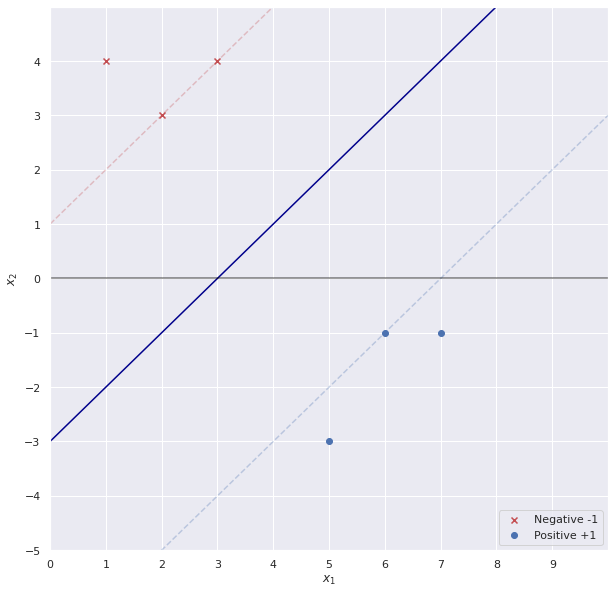

     pcost       dcost       gap    pres   dres
 0: -1.5556e+01 -2.5999e+02  3e+02  1e-01  2e-14
 1: -1.8050e+01 -3.9497e+01  2e+01  4e-03  1e-14
 2: -2.1437e+01 -2.3412e+01  2e+00  3e-04  2e-14
 3: -2.2496e+01 -2.2997e+01  5e-01  3e-05  1e-14
 4: -2.2561e+01 -2.2568e+01  6e-03  3e-07  2e-14
 5: -2.2562e+01 -2.2563e+01  6e-05  3e-09  2e-14
 6: -2.2562e+01 -2.2563e+01  6e-07  3e-11  1e-14
Optimal solution found.
Alphas =  [4.9999998  6.31250013 1.31249982 9.99999997]
w =  [ 0.25000001 -0.25000001]
b =  [-0.74999997]


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 9 00:13:31 2021

@author: CHINNA
"""

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.svm import SVC
from cvxopt import matrix
from cvxopt import solvers

#Data set
x_neg = np.array([[3,4],[1,4],[2,3]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[6,-1],[7,-1],[5,-3]])
y_pos = np.array([1,1,1])
x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))

#Data
X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos,y_neg))

#Parameters guessed by inspection
w = np.array([1,-1]).reshape(-1,1)
b = -3

#Plot
fig = plt.figure(figsize = (10,10))
plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
plt.plot(x1, x1  - 3, color = 'darkblue')
plt.plot(x1, x1  - 7, linestyle = '--', alpha = .3, color = 'b')
plt.plot(x1, x1  + 1, linestyle = '--', alpha = .3, color = 'r')
plt.xlim(0,10)
plt.ylim(-5,5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.legend(loc = 'lower right')
plt.show()


#New dataset (for later)
X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3],[2,4]] )
y = np.array([-1,-1, -1, 1, 1 , 1, 1 ])

#Initializing values and computing H. Note the 1. to force to float type
C = 10
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = matrix(H)
q = matrix(-np.ones((m, 1)))
G = matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = matrix(y.reshape(1, -1))
b = matrix(np.zeros(1))

#Run solver
sol = solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

clf = SVC(C = 10, kernel = 'linear')
clf.fit(X, y.ravel()) 



1(b) Discuss the results of running your implementation on random data
generated in the following way: for class A (corresponding to +1),
generate 200 points where according to a two-dimensional gaussian
with mean (−1; −1) and covariance matrix
0:1 0 25 1 :25 :
For class B, generate 200 points using the same distribution except
change the mean to (1; 1). Seed your random number generator with
the last 5 digits of your Lib# (located on your FSU card).
Plot the decision boundary of the classifier along with the training
points. What are the support vectors? What is the margin? Compute the leave-one-out cross validation error. Vary the tradeoff parameter C between the misclassification error and the margin; plot
the decision boundary for different values of C.

     pcost       dcost       gap    pres   dres
 0:  7.5060e+05 -3.5831e+07  6e+07  3e-01  3e-12
 1:  6.4041e+05 -4.8062e+06  6e+06  1e-02  5e-12
 2:  6.2386e+03 -6.6842e+05  7e+05  5e-04  4e-12
 3: -2.6944e+04 -1.4271e+05  1e+05  8e-05  4e-12
 4: -3.0747e+04 -1.2435e+05  9e+04  6e-05  4e-12
 5: -3.4227e+04 -9.8881e+04  6e+04  4e-05  4e-12
 6: -3.6712e+04 -8.3331e+04  5e+04  3e-05  4e-12
 7: -3.8823e+04 -7.3180e+04  3e+04  2e-05  4e-12
 8: -4.0854e+04 -6.5359e+04  2e+04  1e-05  4e-12
 9: -4.2279e+04 -6.1535e+04  2e+04  7e-06  4e-12
10: -4.3946e+04 -5.6963e+04  1e+04  4e-06  4e-12
11: -4.5198e+04 -5.3947e+04  9e+03  2e-06  5e-12
12: -4.5767e+04 -5.2374e+04  7e+03  2e-06  5e-12
13: -4.6473e+04 -5.0778e+04  4e+03  9e-07  5e-12
14: -4.6932e+04 -4.9861e+04  3e+03  5e-07  5e-12
15: -4.7139e+04 -4.9130e+04  2e+03  2e-07  5e-12
16: -4.7426e+04 -4.8685e+04  1e+03  4e-08  5e-12
17: -4.7855e+04 -4.8043e+04  2e+02  5e-09  6e-12
18: -4.7923e+04 -4.7952e+04  3e+01  2e-10  7e-12
19: -4.7936e+04 -4.79

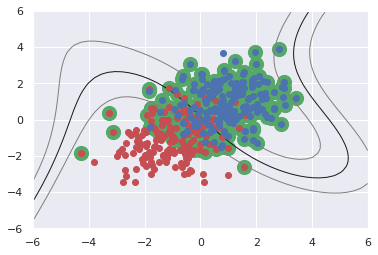

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 12 00:13:31 2021

@author: CHINNA
"""
# Linearly Separable data with Overlapping was used for this program
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
leaveoo = LeaveOneOut()
def linear_kernel(x1, x2):
    return np.dot(x1, x2)
def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=gaussian_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

def gen_lin_separable_overlap_data():
    # generate training data in the 2-d case
    mean1 = np.array([-1,-1])
    mean2 = np.array([1,1])
    cov = np.array([[1.0,0.25], [0.25, 1.0]])
    X1 = np.random.multivariate_normal(mean1, cov, 200)
    y1 = np.ones(len(X1))
    np.random.seed(59483)
    X2 = np.random.multivariate_normal(mean2, cov, 200)
    y2 = np.ones(len(X2)) * -1
    return X1, y1, X2, y2

def leave_one_out(X1,y1,X2,y2):
    for train_index, test_index in leaveoo.split(X1):
         train_X, test_X = X1[train_index], X1[test_index]
         train_Y, test_Y = y1[train_index], y1[test_index]
    for train_index, test_index in leaveoo.split(X2):
         train2_X, test2_X = X2[train_index], X2[test_index]
         train2_Y, test2_Y = y2[train_index], y2[test_index]
    return train_X,test_X,train_Y,test_Y,train2_X,test2_X,train2_Y,test2_Y

def split_train(X1, y1, X2, y2):
    X1_train = X1[:180]
    y1_train = y1[:180]
    X2_train = X2[:180]
    y2_train = y2[:180]
    X_train = np.vstack((X1_train, X2_train))
    y_train = np.hstack((y1_train, y2_train))
    return X_train, y_train

def split_test(X1, y1, X2, y2):
    X1_test = X1[180:]
    y1_test = y1[180:]
    X2_test = X2[180:]
    y2_test = y2[180:]
    X_test = np.vstack((X1_test, X2_test))
    y_test = np.hstack((y1_test, y2_test))
    return X_test, y_test

def plot_margin(X1_train, X2_train, clf):
    def f(x, w, b, c=0):
        # given x, return y such that [x,y] in on the line
        # w.x + b = c
        return (-w[0] * x - b + c) / w[1]

    plt.plot(X1_train[:,0], X1_train[:,1], "ro")
    plt.plot(X2_train[:,0], X2_train[:,1], "bo")
    plt.scatter(clf.sv[:,0], clf.sv[:,1], s=200, c="g")

    # w.x + b = 0
    a0 = -4; a1 = f(a0, clf.w, clf.b)
    b0 = 4; b1 = f(b0, clf.w, clf.b)
    plt.plot([a0,b0], [a1,b1], "k")

    # w.x + b = 1
    a0 = -4; a1 = f(a0, clf.w, clf.b, 1)
    b0 = 4; b1 = f(b0, clf.w, clf.b, 1)
    plt.plot([a0,b0], [a1,b1], "k--")

    # w.x + b = -1
    a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
    b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
    plt.plot([a0,b0], [a1,b1], "k--")

    plt.axis("tight")
    plt.show()

def plot_contour(X1_train, X2_train, clf):
    plt.plot(X1_train[:,0], X1_train[:,1], "ro")
    plt.plot(X2_train[:,0], X2_train[:,1], "bo")
    plt.scatter(clf.sv[:,0], clf.sv[:,1], s=200, c="g")

    X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Z = clf.project(X).reshape(X1.shape)
    plt.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
    plt.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
    plt.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

    plt.axis("tight")
    plt.show()
def test_soft():
    X1, y1, X2, y2 = gen_lin_separable_overlap_data()
    X_train, y_train = split_train(X1, y1, X2, y2)
    X_test, y_test = split_test(X1, y1, X2, y2)
    # For Leave one out cross validation
    #train_X,test_X,train_Y,test_Y,train2_X,test2_X,train2_Y,test2_Y=leave_one_out(X1,y1,X2,y2)
    #X_train, y_train = split_train(train_X,test_X,train_Y,test_Y)
    #X_test, y_test = split_test(train2_X,test2_X,train2_Y,test2_Y)
    

    #Decision boundaries for different C values
    #clf = SVM(C=0.1)
    #clf = SVM(C=1)
    #clf = SVM(C=50)
    #clf = SVM(C=100)
    clf = SVM(C=500)
    #clf = SVM(C=1000)
    #clf = SVM(C=10000)   

    clf.fit(X_train, y_train)

    y_predict = clf.predict(X_test)
    correct = np.sum(y_predict == y_test)
    print("%d out of %d predictions correct" % (correct, len(y_predict)))
    plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

        
test_soft()

1(c) Download the MNIST dataset http://yann.lecun.com/exdb/mnist/.
Use the training patterns to train your SVM implementation to distinguish between the classes corresponding to 0 and 1. What is the
generalization error on the testing patterns?

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


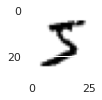

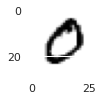

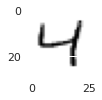

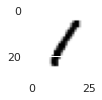

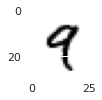

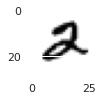

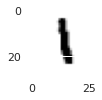

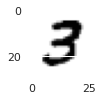

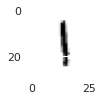

Train (12665, 28, 28) (12665,)
Test (2115, 28, 28) (2115,)
(12665, 784)
True Values : [1 0 1 ... 1 0 1] Predicted Values : [1 0 1 ... 1 0 1]
accuracy: 0.9990543735224586 

[[ 979    1]
 [   1 1134]]


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 11 21:05:43 2021

@author: CHINNA
"""

import matplotlib.pyplot as plt
from keras.datasets.mnist import load_data
import numpy as np
import pandas as pd
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
#Splitting into train and test data
(X_train, Y_train),(X_test, Y_test) = load_data()
print('Train',X_train.shape,Y_train.shape)
print('Test',X_test.shape,Y_test.shape)
#Showing image from training dataset in B&W
for i in range(9):
    plt.subplot(3,3,1+i)
    plt.imshow(X_train[i],cmap='gray_r')
    plt.show()

#Removing all the classes except 0 and 1
train_filter = np.where((Y_train == 0 ) | (Y_train == 1))
test_filter = np.where((Y_test == 0) | (Y_test == 1))
trainX, trainY = X_train[train_filter], Y_train[train_filter]
testX, testY = X_test[test_filter], Y_test[test_filter]
print('Train',trainX.shape,trainY.shape)
print('Test',testX.shape,testY.shape)
Train_X = trainX.reshape(12665, 784)
Test_X = testX.reshape(2115, 784)
print(Train_X.shape)

#Normalizing and Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(Train_X)
scaler.fit(Test_X)
normalized_X_train = scaler.transform(Train_X)
normalized_X_test = scaler.transform(Test_X)

model_linear = LinearSVC(dual=False)
model_linear.fit(Train_X, trainY)

y_pred = model_linear.predict(Test_X)
print("True Values :",testY,"Predicted Values :",y_pred)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=testY, y_pred=y_pred), "\n")
pred=model_linear.predict(Test_X)
# cm
print(metrics.confusion_matrix(y_true=testY, y_pred=y_pred))



In [ ]:
(a) Implement linear regression, given an input set of vectors in Rd. Create a binary classifier by thresholding the output at 0. Discuss the
1results of running your implementation on the sample data generated
for 1(b).
Plot the decision boundary of the classifier along with the training
points. Compute the leave-one-out cross validation error

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Salary_Data.csv']))


Saving Salary_Data.csv to Salary_Data (1).csv


In [ ]:
url = 'https://raw.githubusercontent.com/venkatbhaskar4u/Capg/main/Salary_Data.csv'
data = pd.read_csv(url)

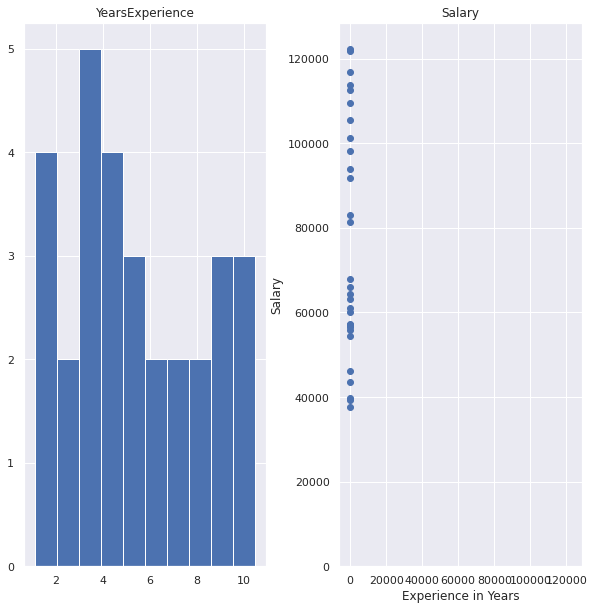

1.0
1.0
24828.690149892936
9711.762526766594
Y= 24828.690149892936 *X+ 9711.762526766594
Predicted Value : 39396.33394004282
Predicted Value : 2.591837452854969
20290468538.155865


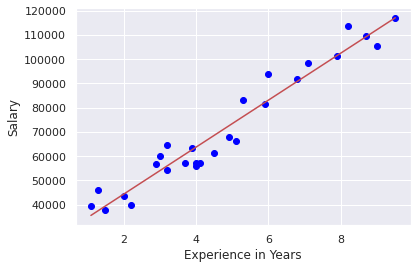

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 18 00:13:31 2021

@author: CHINNA
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Loading data
data = pd.read_csv(io.BytesIO(uploaded['Salary_Data.csv']))
#Describing data
data.describe()
data.hist(figsize=(10,10))
#Plotting one vs another
plt.scatter(data["YearsExperience"],data["Salary"])
plt.ylabel("Salary")
plt.xlabel("Experience in Years")
plt.show()
# Test train split
train=data[:(int((len(data)*0.9)))]
test=data[(int((len(data)*0.9))):]
#Calculating mean
salary=data["Salary"]
sum_salary=salary.sum()
sal_mean=salary.mean()
# Model
def linear_regression(input,output):
    X=input
    Y=output
    N=len(X)
    Y_mean=Y.mean()
    X_mean=X.mean()
    S_YX=(Y*X).sum()
    YX_N=(Y.sum()*X.sum())/N
    XX_S=(X*X).sum()
    XX_N=(X.sum()*X.sum())/N
    slope=(S_YX-YX_N)/(XX_S-XX_N)
    intercept=Y_mean-slope*X_mean
    return (intercept,slope)

# Testing on random data
test_i=np.array(range(5))
test_o=np.array(1+1*test_i)
(test_intercept,test_slope)=linear_regression(test_i,test_o)
print(test_intercept)
print(test_slope)

# Training on real data
sal_intercept,sal_slope=linear_regression(train["YearsExperience"],train["Salary"])
print(sal_intercept)
print(sal_slope)
print("Y=",sal_intercept,"*X+",sal_slope)
#Plotting regression line or Decision Boundary
plt.scatter(train.YearsExperience,train.Salary, color='blue')
plt.plot(train["YearsExperience"],sal_slope*train["YearsExperience"]+sal_intercept,'-r')
plt.ylabel("Salary")
plt.xlabel("Experience in Years")

#Prediction
def prediction(input,intercept,slope):
    predicted_value=input*slope+intercept
    return predicted_value

YE=1.5
predicted_salary=prediction(YE,sal_intercept,sal_slope)
print("Predicted Value :",predicted_salary)

#Inverse Prediction
def inverse_prediction(input,intercept,slope):
    #output=intercept+slope*input
    predicted_value=(input-intercept)/slope
    return predicted_value

sal=50000
predicted_YE=inverse_prediction(sal,sal_intercept,sal_slope)
print("Predicted Value :",predicted_YE)

# Error checking
def Mean_SS(input,output,intercept,slope):
    Y=output
    prediction=input*slope+intercept
    var=((Y-prediction)*(Y-prediction)).sum()
    MSE=var/len(Y)
    return MSE

print(Mean_SS(test["YearsExperience"],test["Salary"],sal_slope,sal_intercept))


Discuss the results of running your implementation on the sample data generated
for 1(b).

Using Data Generated in 1(b) to train linear regression

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 19 02:16:57 2021

@author: CHINNA
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
mean1 = np.array([-1,-1])
mean2 = np.array([1, 1])
cov = np.array([[1, 0.25], [0.25, 1]])
X1 = np.random.multivariate_normal(mean1, cov, 200)
y1 = np.ones(len(X1))
np.random.seed(52493)
X2 = np.random.multivariate_normal(mean2, cov, 200)
y2 = np.ones(len(X2))*-1
X1_train,y1_train=X1[:180],y1[:180]
X2_train,y2_train=X2[:180],y2[:180]
X_train = np.vstack((X1_train, X2_train))
y_train = np.hstack((y1_train, y2_train))
X1_test,y1_test=X1[180:],y1[180:]
X2_test,y2_test=X2[180:],y2[180:]
X_test = np.vstack((X1_test, X2_test))
y_test = np.hstack((y1_test, y2_test))
# For Leave one out cross validation
#def leave_one_out(X1,y1,X2,y2):
#    for train_index, test_index in leaveoo.split(X1):
#         train_X, test_X = X1[train_index], X1[test_index]
#         train_Y, test_Y = y1[train_index], y1[test_index]
#    for train_index, test_index in leaveoo.split(X2):
#         train2_X, test2_X = X2[train_index], X2[test_index]
#         train2_Y, test2_Y = y2[train_index], y2[test_index]
#    return train_X,test_X,train_Y,test_Y,train2_X,test2_X,train2_Y,test2_Y
#train_X,test_X,train_Y,test_Y,train2_X,test2_X,train2_Y,test2_Y=leave_one_out(X1,y1,X2,y2)
#X_train, y_train = split_train(train_X,test_X,train_Y,test_Y)
#X_test, y_test = split_test(train2_X,test2_X,train2_Y,test2_Y)


X_train_standardized = (X_train - X_train .mean()) / X_train.std()
X_test_standardized  = (X_test - X_train.mean()) /  X_train.std()
def error_function(y_actual,y_predicted):
    error = 0
    for i in range(0,len(y_actual)):
        error =  error + pow((y_actual[i] - y_predicted[i]),2)
        return error/(2*len(y_actual))

def y_predicted(w,x):
    y_pred = np.zeros(len(x))
    for i in range(0,len(x)):
        for j in range(0,len(w)):
            y_pred[i] = y_pred[i]+(w[j]*x[i][j] + w[-1])
    return y_pred

def gradient_descent(y_actual,y_pred,x):
    grad = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        for j in range(0,len(y_actual)):
            grad[i] = - (y_actual[j] - y_pred[j])*x[j][i] + grad[i]
    return grad/len(y_actual)


def weights(x_train,y_train,num_iterations,learning_rate):
    no_of_rows = x_train.shape[0]
    no_of_columns = x_train.shape[1]
    new_x_train = np.ones((no_of_rows,no_of_columns+1))
    new_x_train[:,0:no_of_columns] = x_train
    w = np.zeros(no_of_columns)
    w =np.append(w,1)
    for i in range(0,num_iterations):
        y_pred = y_predicted(w,new_x_train)
        error = error_function(y_train,y_pred)
        print("mean square error: ",error,"after",i,"th iteration")
        MSE_points.append(error)
        grad = gradient_descent(y_train,y_pred,new_x_train)
        w = w - learning_rate*grad
        learning_rate = learning_rate/1.05                                # Learning rate Decay 
    return w

def regression_test(x_test,w):
    row = x_test.shape[0]
    column = x_test.shape[1]
    new_x_test = np.ones((row,column+1))
    new_x_test[:,0:column] = x_test
    y_pred = y_predicted(w,new_x_test)
    return(y_pred)
MSE_points = []
num_iterations = 300
learning_rate = 0.1
w = weights(X_train_standardized,y_train,num_iterations,learning_rate)
Y_pred = regression_test(X_test_standardized,w)
error_function(y_test,Y_pred)

import seaborn as sns
plt.figure(figsize=(10,10))
plt.plot(range(0,300 ), MSE_points)
plt.xlabel('MSE')
plt.show()

pred_df = pd.DataFrame(
    {
        'Actual Value' : y_test, 
     'Predicted Values' : Y_pred,
    }
)
pred_df.head(10)
plt.scatter(y_test, Y_pred)